##Modelo de Clasificacion de Imagenes con Redes Neuronales Convolucionales (CNN) Utilizando CIFAR-10 y TensorFlow
Este proyecto tiene como objetivo desarrollar un modelo de clasificacion de imagenes utilizando Redes Neuronales Convolucionales (CNN), enfocandonos en el conjunto de datos CIFAR-10 y utilizando TensorFlow. El CIFAR-10, con su diversidad de categorias de imagenes, ofrece un desafio interesante en el campo del aprendizaje automatico y la vision por computadora.

##Objetivo del Proyecto
El proposito principal es construir y entrenar un modelo de aprendizaje profundo que sea capaz de clasificar imagenes en categorias especificas con alta precision. Para lograr esto, implementaremos una arquitectura de red neuronal convolucional, que es altamente efectiva en tareas de clasificacion y reconocimiento de imagenes.

##Conjunto de Datos CIFAR-10
El CIFAR-10 es un conjunto de datos que incluye imagenes a color de 32x32 pixeles en 10 categorias diferentes: aviones, automoviles, pajaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones. Cada imagen viene etiquetada con la categoria correspondiente, proporcionando un terreno fertil para practicas y experimentos en clasificacion de imagenes.

##Desarrollo del Modelo
El flujo de trabajo abarcara la preparacion y preprocesamiento de los datos, la construccion de la arquitectura de la red neuronal, el entrenamiento del modelo y la evaluacion de su rendimiento. Se dara especial atencion a las metricas clave y a la visualizacion para entender mejor el comportamiento y la efectividad del modelo desarrollado
Este enfoque proporciona una excelente oportunidad para explorar y aplicar tecnicas avanzadas de aprendizaje automatico y vision por computadora en un conjunto de datos complejo y diverso como el CIFAR-10, utilizando las capacidades y herramientas que ofrece TensorFlow.

In [ ]:
!pip install scikit-learn

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=ead767040a60418ad413cace3c0b34309f679756d1efccf6066ea7a491b581c9
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
!pip install keras

#Librerias Utilizadas
##NumPy (np):
Descripcion: NumPy es una biblioteca fundamental en Python para el procesamiento numerico. Proporciona soporte para arreglos multidimensionales y funciones matematicas eficientes.
Uso en el Proyecto: Se utiliza para la generacion de numeros aleatorios y manipulacion de datos.
##Matplotlib (plt)
Descripcion: Matplotlib es una biblioteca de visualizacion en 2D en Python. Se utiliza para crear graficos y visualizaciones.
Uso en el Proyecto: Se utiliza para visualizar imagenes y representar graficos de metricas.
##TensorFlow y Keras
##TensorFlow: Una plataforma de codigo abierto para aprendizaje automatico y profundo.
##Keras: Una interfaz de alto nivel para construir y entrenar modelos de aprendizaje profundo integrada en TensorFlow.
Uso en el Proyecto: Se utilizan para construir y entrenar modelos de CNN. TensorFlow proporciona el backend y las herramientas necesarias, mientras que Keras facilita la definicion y construccion del modelo.
##Scikit-Learn
Descripcion: Scikit-Learn es una biblioteca de aprendizaje automatico en Python con herramientas sencillas y eficientes para el analisis de datos y modelado estadistico.#Uso en el Proyecto: Se utiliza para calcular la matriz de confusion y otras metricas de evaluacion.
##Seaborn
Descripcion: Seaborn es una biblioteca de visualizacion de datos en Python basada en Matplotlib. Proporciona una interfaz de alto nivel para dibujar graficos estadisticos atractivos e informativos.
Uso en el Proyecto: Se utiliza para visualizar la matriz de confusion y otros datos estadisticos.
Descripcion del Modelo

El modelo se construye utilizando la arquitectura de Red Neuronal Convolucional (CNN). Incluye capas de convolucion (Conv2D), capas de pooling (MaxPooling2D), normalizacion por lotes (BatchNormalization), capas de aplanamiento (Flatten), capas densas (Dense) y capas de abandono (Dropout). Tambien se implementan generadores de imagenes (ImageDataGenerator) para aumentar los datos de entrenamiento, y se utilizan EarlyStopping y ModelCheckpoint para optimizar el entrenamiento. El objetivo es lograr un alto rendimiento en la clasificacion de imagenes del conjunto de datos CIFAR-10.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array

import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


#Introduccion al Dataset CIFAR-10
El CIFAR-10 es un conjunto de datos estandar en el campo de la vision por computadora. Consiste en 60,000 imagenes en color de 32x32 pixeles, divididas en 10 clases con 6,000 imagenes por clase. Este conjunto de datos se utiliza comunmente para entrenar y probar algoritmos de aprendizaje automatico y redes neuronales en tareas de clasificacion de imagenes.

###Importacion de Librerias
Primero, importamos las librerias necesarias: tensorflow_datasets (tfds) y tensorflow (tf). TensorFlow Datasets proporciona una forma sencilla de descargar y acceder a datasets, mientras que TensorFlow es el framework principal para construir y entrenar modelos de aprendizaje profundo.
Carga del Dataset
Utilizamos tfds.load para cargar el dataset CIFAR-10. Se especifican los siguientes parametros:

###Nombre del dataset: 'cifar10'.
Division del dataset: 'train' para el conjunto de entrenamiento y 'test' para el conjunto de prueba.
Mezcla de archivos: Habilitado para introducir aleatoriedad.
Supervision: Configurado para devolver tuplas (imagen, etiqueta) en lugar de diccionarios.
Desempaquetado de Conjuntos de Datos
Desempaquetamos los conjuntos de entrenamiento y prueba en dos variables separadas, train_dataset y test_dataset, para facilitar su manejo durante el entrenamiento y la validacion.

###Conteo de Muestras
Para entender la escala de los datos con los que estamos trabajando, contamos el numero de muestras en cada conjunto. Esto es crucial para configurar los parametros de entrenamiento como el tamaño del lote y el numero de epocas.

###Visualizacion de la Cantidad de Datos
Finalmente, imprimimos el numero de muestras en los conjuntos de entrenamiento y prueba para tener una vision clara del volumen de datos disponibles.


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Cargar el dataset CIFAR-10
cifar10_dataset = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True  # Retorna una tupla (img, label) en lugar de un diccionario
)

# Desempaquetar los conjuntos de datos
train_dataset, test_dataset = cifar10_dataset

# Cuenta el numero de ejemplos en cada conjunto de datos
num_train_samples = len(list(train_dataset))
num_test_samples = len(list(test_dataset))

print("Numero de muestras de entrenamiento:", num_train_samples)
print("Numero de muestras de prueba:", num_test_samples)


Número de muestras de entrenamiento: 50000
Número de muestras de prueba: 10000


##Introduccion al Preprocesamiento de Datos
El preprocesamiento de datos es una etapa crucial en cualquier proyecto de aprendizaje automatico. Su objetivo es transformar las imagenes crudas en un formato adecuado para alimentar a un modelo de red neuronal, mejorando asi la eficacia y eficiencia del entrenamiento.

#Definicion de Funciones de Preprocesamiento
Para el dataset CIFAR-10, definimos dos funciones de preprocesamiento: una para el conjunto de entrenamiento (preprocess_train) y otra para el conjunto de prueba (preprocess_test).

#Funcion preprocess_train
Esta funcion se encarga del preprocesamiento de las imagenes de entrenamiento. Las etapas incluyen:

#Normalizacion: Convertimos los valores de los pixeles a flotantes y los normalizamos para que esten en el rango [0, 1].
Aumentacion de Datos: Aplicamos tecnicas de aumentacion como voltear las imagenes horizontal y verticalmente, y ajustar el brillo y el contraste. Estas tecnicas ayudan a reducir el sobreajuste y mejorar la generalizacion del modelo.
Codificacion One-Hot para Etiquetas: Convertimos las etiquetas en un formato one-hot, adecuado para la clasificacion multiclase.

In [ ]:
# def preprocess_train(image, label):
#     image = tf.cast(image, tf.float32) / 255.0  # Normalizar

#     # Aumentacion de datos
#     image = tf.image.random_flip_left_right(image)
#     image = tf.image.random_flip_up_down(image)
#     # Puedes añadir mas transformaciones si lo deseas

#     label = tf.one_hot(label, depth=10)  # Convertir a formato one-hot
#     return image, label

# def preprocess_test(image, label):
#     image = tf.cast(image, tf.float32) / 255.0  # Normalizar
#     label = tf.one_hot(label, depth=10)  # Convertir a formato one-hot
#     return image, label

# Funciones de preprocesamiento
def preprocess_train(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)  # Ajustar brillo
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)  # Ajustar contraste
    label = tf.one_hot(label, depth=10)
    return image, label

def preprocess_test(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=10)
    return image, label


# Aplicar el preprocesamiento y la aumentacion a los conjuntos de datos
train_dataset = train_dataset.map(preprocess_train).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_test).batch(32)




In [ ]:
def load_and_preprocess_image(image_path, target_size=(32, 32)):
    # Cargar la imagen y cambiar su tamaño
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)  # Convertir a array
    img = np.expand_dims(img, axis=0)  # Añadir la dimension del lote
    img = img / 255.0  # Normalizar
    return img

##Introduccion al Preprocesamiento de Datos
El preprocesamiento de datos es una etapa crucial en cualquier proyecto de aprendizaje automatico. Su objetivo es transformar las imagenes crudas en un formato adecuado para alimentar a un modelo de red neuronal, mejorando asi la eficacia y eficiencia del entrenamiento.

#Definicion de Funciones de Preprocesamiento
Para el dataset CIFAR-10, definimos dos funciones de preprocesamiento: una para el conjunto de entrenamiento (preprocess_train) y otra para el conjunto de prueba (preprocess_test).

#Funcion preprocess_train
Esta funcion se encarga del preprocesamiento de las imagenes de entrenamiento. Las etapas incluyen:

#Normalizacion: Convertimos los valores de los pixeles a flotantes y los normalizamos para que esten en el rango [0, 1].
Aumentacion de Datos: Aplicamos tecnicas de aumentacion como voltear las imagenes horizontal y verticalmente, y ajustar el brillo y el contraste. Estas tecnicas ayudan a reducir el sobreajuste y mejorar la generalizacion del modelo.
Codificacion One-Hot para Etiquetas: Convertimos las etiquetas en un formato one-hot, adecuado para la clasificacion multiclase.

In [ ]:
# # # Construccion del modelo
# # model = Sequential()
# # model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(96, 96, 3)))
# # model.add(BatchNormalization())
# # model.add(MaxPooling2D((2, 2)))

# # model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# # model.add(BatchNormalization())
# # model.add(MaxPooling2D((2, 2)))

# # model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# # model.add(BatchNormalization())
# # model.add(MaxPooling2D((2, 2)))

# # model.add(Flatten())
# # model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.5))
# # model.add(Dense(10, activation='softmax'))

# # # Compilar el modelo
# # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# # Construccion del modelo
# model = Sequential()

# # Primera capa convolucional
# model.add(Conv2D(16, (3, 3), activation='leaky_relu',name="CNN1", padding='same', input_shape=(96, 96, 3)))
# model.add(BatchNormalization(name='batch_norm_1'))
# model.add(MaxPooling2D((2, 2),name='max_pool_1'))

# # Segunda capa convolucional
# model.add(Conv2D(32, (3, 3), activation='leaky_relu',name="CNN2", padding='same'))
# model.add(BatchNormalization(name='batch_norm_2'))
# model.add(MaxPooling2D((2, 2),name='max_pool_2'))

# # Tercera capa convolucional
# model.add(Conv2D(64, (3, 3), activation='relu',name="CNN3", padding='same'))
# model.add(BatchNormalization(name='batch_norm_3'))
# model.add(MaxPooling2D((2, 2),name='max_pool_3'))

# # Cuarta capa convolucional
# # model.add(Conv2D(128, (3, 3), activation='relu',name="CNN4", padding='same'))
# # model.add(BatchNormalization(name='batch_norm_4'))
# # model.add(MaxPooling2D((2, 2),name='max_pool_4'))

# # # Quinta capa convolucional
# # model.add(Conv2D(256, (3, 3), activation='relu',name="CNN5", padding='same'))
# # model.add(BatchNormalization(name='batch_norm_5'))
# model.add(Flatten())

# # Capas densas
# model.add(Dense(1000, activation='leaky_relu'))
# model.add(Dropout(0.5))
# model.add(Dense(500, activation='leaky_relu'))
# model.add(Dropout(0.35))
# model.add(Dense(70, activation='leaky_relu'))
# model.add(Dropout(0.1))

# # Capa de salida
# model.add(Dense(10, activation='softmax'))

# # Compilar el modelo
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model = Sequential([
#     # Primera capa convolucional
#     Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)),
#     # Segunda capa convolucional
#     Conv2D(64, kernel_size=3, padding='same', activation='relu'),
#     # Primera capa de Max Pooling
#     MaxPooling2D(pool_size=(2, 2)),

#     # Tercera capa convolucional
#     Conv2D(128, kernel_size=3, padding='same', activation='relu'),
#     # Cuarta capa convolucional
#     Conv2D(128, kernel_size=3, padding='same', activation='relu'),
#     # Segunda capa de Max Pooling
#     MaxPooling2D(pool_size=(2, 2)),

#     # Quinta capa convolucional
#     Conv2D(256, kernel_size=3, padding='same', activation='relu'),
#     # Sexta capa convolucional
#     Conv2D(256, kernel_size=3, padding='same', activation='relu'),
#     # Tercera capa de Max Pooling
#     MaxPooling2D(pool_size=(2, 2)),

#     # Aplanamiento de las caracteristicas para la transicion a capas densas
#     Flatten(),
#     # Capas densas
#     Dense(1024, activation='relu'),
#     Dense(512, activation='relu'),
#     Dense(10, activation='softmax')  # Asumiendo una clasificacion de 10 clases
# ])
# # Compilacion del modelo
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Construccion y Compilacion del Modelo de Red Neuronal Convolucional para CIFAR-10
###Introduccion al Modelo
En esta seccion, construimos y compilamos un modelo de red neuronal convolucional (CNN) para clasificar las imagenes del dataset CIFAR-10. Las CNN son especialmente efectivas para tareas de vision por computadora debido a su capacidad para detectar patrones espaciales en las imagenes.

###Arquitectura del Modelo
Utilizamos la API Sequential de Keras para construir nuestro modelo. La arquitectura del modelo se compone de varias capas convolucionales, capas de agrupacion maxima (MaxPooling) y capas densas.

Capas Convolucionales: Estas capas extraen caracteristicas de las imagenes mediante la aplicacion de filtros. Empezamos con 32 filtros y aumentamos gradualmente hasta 256. Cada capa convolucional utiliza una funcion de activacion ReLU (Rectified Linear Unit) y un padding 'same' para mantener el tamaño de la imagen.

Capas de Agrupacion Maxima (MaxPooling): Estas capas reducen la dimensionalidad espacial de la entrada, lo cual es util para disminuir el numero de parametros y la cantidad de calculos requeridos en la red, ademas de controlar el sobreajuste.

Aplanamiento (Flatten): La capa Flatten convierte los mapas de caracteristicas en un vector de una dimension, necesario para alimentar las capas densas.

Capas Densas: Tras el aplanamiento, seguimos con capas densas que tienen 1024 y 512 unidades, respectivamente, tambien utilizando la activacion ReLU. La ultima capa densa tiene 10 unidades (una por cada clase del CIFAR-10) y utiliza la activacion softmax para la clasificacion multiclase.

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Verificar las formas de los datos
for images, labels in train_dataset.take(1):
    print("Forma de las imagenes: ", images.shape)
    print("Forma de las etiquetas: ", labels.shape)


Forma de las imágenes:  (32, 32, 32, 3)
Forma de las etiquetas:  (32, 10)


#Entrenamiento del Modelo y Evaluacion con Callbacks en TensorFlow
Configuracion de Callbacks
Los callbacks son herramientas poderosas en TensorFlow que permiten realizar acciones o comprobar ciertas condiciones durante el proceso de entrenamiento. Aqui, configuramos dos callbacks importantes:

EarlyStopping: Este callback monitorea el valor de la perdida en el conjunto de validacion (val_loss). Si el valor no mejora durante un numero especificado de epocas (patience=5), el entrenamiento se detiene prematuramente. Esto ayuda a prevenir el sobreajuste.

ModelCheckpoint: Este callback guarda el modelo en un archivo ('mejor_modelo.h5') cada vez que se observa una mejora en la perdida de validacion (val_loss). Se asegura de que solo se guarde la mejor version del modelo (cuando save_best_only=True).

#Entrenamiento del Modelo
Con los callbacks configurados, procedemos a entrenar el modelo. Utilizamos los siguientes parametros:

Conjunto de Datos de Entrenamiento: train_dataset.

1) Numero de epocas: 40.

2) Conjunto de Datos de Validacion: test_dataset.

3) Callbacks: Lista que incluye early_stopping y model_checkpoint.

#Evaluacion del Mejor Modelo
Despues del entrenamiento, cargamos el mejor modelo guardado desde el archivo 'mejor_modelo.h5'. Luego, evaluamos este modelo en el conjunto de prueba para obtener la perdida y la precision.

Carga del Modelo Guardado: Utilizamos tf.keras.models.load_model para cargar el mejor modelo.
Evaluacion en el Conjunto de Prueba: Calculamos la perdida y la precision en el conjunto de prueba.

In [ ]:

# Configuracion de callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('mejor_modelo.h5', monitor='val_loss', save_best_only=True)

# Entrenamiento del modelo
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=test_dataset,
    callbacks=[early_stopping, model_checkpoint]
)

# Cargar el mejor modelo guardado y evaluar en el conjunto de prueba
best_model = tf.keras.models.load_model('mejor_modelo.h5')
test_loss, test_accuracy = best_model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/40
1563/1563 [==============================] - 29s 16ms/step - loss: 1.7564 - accuracy: 0.3293 - val_loss: 1.4781 - val_accuracy: 0.4582
Epoch 2/40
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3266 - accuracy: 0.5136 - val_loss: 1.2879 - val_accuracy: 0.5397
Epoch 3/40
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1374 - accuracy: 0.5919 - val_loss: 1.0570 - val_accuracy: 0.6168
Epoch 4/40
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0117 - accuracy: 0.6374 - val_loss: 0.9652 - val_accuracy: 0.6547
Epoch 5/40
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9192 - accuracy: 0.6704 - val_loss: 0.9195 - val_accuracy: 0.6695
Epoch 6/40
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8582 - accuracy: 0.6949 - val_loss: 0.9029 - val_accuracy: 0.6785
Epoch 7/40
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8067 - accuracy: 0.7143 - val_loss: 0.8302 -


#Conclusion de las Metricas Obtenidas en el Entrenamiento y Evaluacion del Modelo
#Evaluacion Final del Modelo
El modelo alcanzo una precision del 75.27% en el conjunto de prueba. Esta metrica es crucial, ya que refleja como el modelo se desempeña en datos no vistos anteriormente. Aunque la precision es razonablemente alta, hay espacio para mejoras. La perdida en el conjunto de prueba fue de 0.7394, lo cual es consistente con las tendencias observadas durante el entrenamiento.

#Analisis de Precision y Perdida Durante el Entrenamiento
El analisis de las curvas de precision y perdida nos ofrece una vision profunda del comportamiento del modelo a lo largo de las epocas de entrenamiento:

Precision de Entrenamiento vs. Validacion: El modelo muestra un aumento constante en la precision de entrenamiento, lo que indica una buena adaptacion a los datos de entrenamiento. Sin embargo, la precision de validacion se estabiliza y no sigue el mismo patron ascendente, lo que puede indicar un comienzo de sobreajuste.

Perdida de Entrenamiento vs. Validacion: La perdida en el entrenamiento disminuye de manera constante, lo cual es una señal positiva. No obstante, la perdida de validacion, despues de cierto punto, no muestra una mejora significativa y tiende a estabilizarse, lo que reafirma la posibilidad de sobreajuste.

#Analisis de la Matriz de Confusion
La matriz de confusion revela como el modelo se desempeña en cada clase individualmente. Las diagonales representan las clasificaciones correctas, mientras que los otros valores muestran los errores de clasificacion. Una matriz de confusion bien balanceada, con altos valores en la diagonal, indicaria un modelo que clasifica bien todas las categorias.

#Evaluacion de las epocas de Entrenamiento
Durante las 20 epocas de entrenamiento, el modelo mostro una mejora constante tanto en precision como en perdida. Sin embargo, se observa que despues de la epoca 15, la mejora en la precision de validacion se ralentiza y la perdida de validacion empieza a fluctuar. Esto sugiere que el modelo puede estar comenzando a sobreajustarse, lo que se refleja en la falta de una mejora continua en la precision de validacion.

#Conclusiones Generales
Rendimiento del Modelo: El modelo tiene un buen rendimiento en general, pero hay señales de sobreajuste, lo que sugiere que podria beneficiarse de una mayor regularizacion o ajustes en la arquitectura.
Precision y Perdida: La precision y la perdida durante el entrenamiento y la validacion muestran tendencias coherentes, pero es importante abordar la brecha entre ellas para mejorar la generalizacion del modelo.
Matriz de Confusion: La evaluacion detallada de la matriz de confusion podria proporcionar insights adicionales para mejorar la clasificacion en categorias especificas.
En resumen, el modelo demuestra una capacidad competente para clasificar imagenes del CIFAR-10, pero hay oportunidades claras para optimizar y afinar su rendimiento y generalizacion.

313/313 [==============================] - 3s 10ms/step - loss: 0.8138 - accuracy: 0.7374
Loss: 0.8138205409049988
Accuracy: 0.7373999953269958


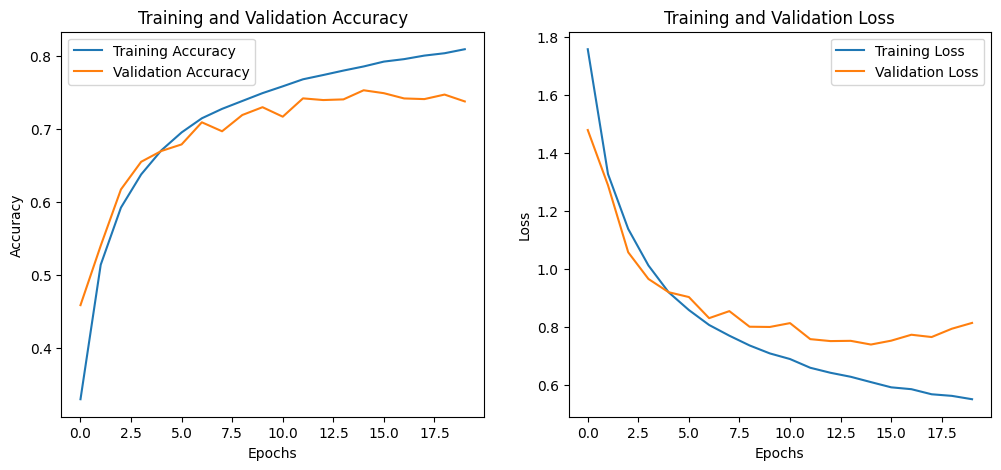

313/313 [==============================] - 2s 5ms/step


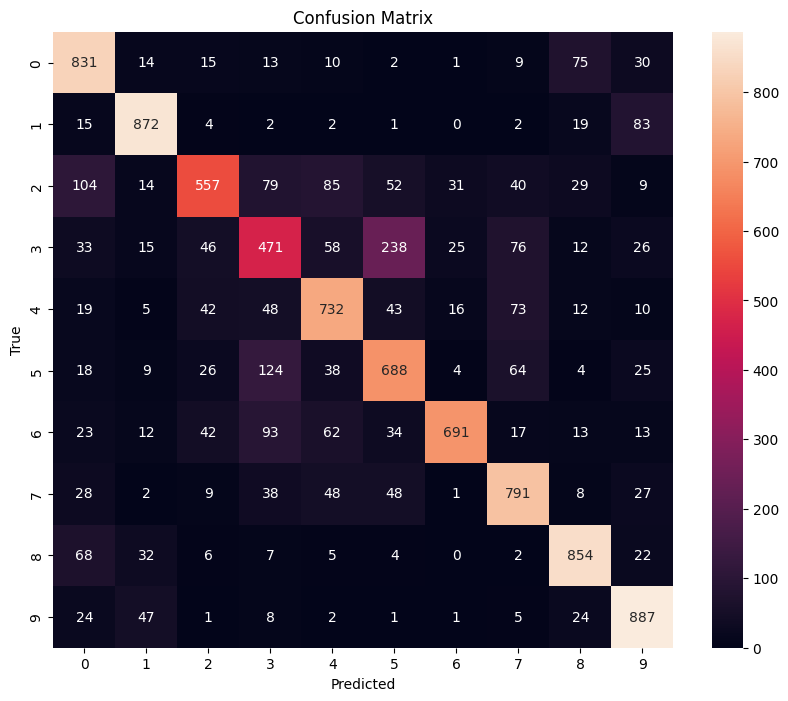

In [ ]:
# Evaluacion del modelo
loss, accuracy = model.evaluate(test_dataset)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Visualizacion de precision y perdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Matriz de confusion
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Funcion para visualizar imagenes por capas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def visualize_layer_outputs(model, layer_names, input_image):
    # Crear un modelo que devuelva las salidas de las capas especificadas
    layer_outputs = [model.get_layer(name).output for name in layer_names]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Predecir para obtener las activaciones
    activations = activation_model.predict(input_image)

    # Visualizar las activaciones de cada capa
    for layer_name, layer_activation in zip(layer_names, activations):
        # Asegurarse de que la capa tenga mas de una dimension
        if len(layer_activation.shape) <= 2:
            continue

        n_features = layer_activation.shape[-1]  # Numero de caracteristicas en la capa
        size = layer_activation.shape[1]  # Tamaño de la caracteristica (asumiendo cuadrado)

        n_cols = n_features // 16  # Ajustar segun la cantidad de caracteristicas
        display_grid = np.zeros((size * n_cols, size * 16))

        for col in range(n_cols):
            for row in range(16):
                if col * 16 + row >= n_features:
                    break  # Evitar indices fuera de rango
                channel_image = layer_activation[0, :, :, col * 16 + row]
                # Procesamiento de la imagen para hacerla mas visualizable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std() + 1e-5
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Lista de nombres de las capas que deseas visualizar
# layer_names = ['CNN1', 'batch_norm_1', 'max_pool_1', 'CNN2', 'batch_norm_2', 'max_pool_2', 'CNN3', 'batch_norm_3', 'max_pool_3',
 #              'flatten', 'dense', 'dropout', 'dense_1', 'dropout_1', 'dense_2', 'dropout_2', 'dense_3']  # Ajustar segun los nombres de tus capas

layer_names = ['conv2d_12', 'conv2d_13', 'max_pooling2d_6', 'conv2d_14', 'conv2d_15', 'max_pooling2d_7', 'conv2d_16', 'conv2d_17', 'max_pooling2d_8', 'flatten_4', 'dense_14', 'dense_15', 'dense_16']  # Ajustar segun los nombres de tus capas

input_image = load_and_preprocess_image("")
# Preparar una imagen de entrada (recuerda preprocesarla como lo haces para el entrenamiento)
# input_image = "train_image_png_970.png"  # Tu imagen de entrada aqui

visualize_layer_outputs(model, layer_names, input_image)